In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import sklearn.metrics as sm   

In [2]:
gunlaws = pd.read_csv('TL-283-1 State Firearm Law Database 4.0.csv')

In [45]:
gunlaws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Law ID                                         2742 non-null   object 
 1   State                                          2742 non-null   object 
 2   State Postal Abbreviation                      2742 non-null   object 
 3   FIPS Code                                      2742 non-null   int64  
 4   Law Class (num)                                2742 non-null   int64  
 5   Law Class                                      2742 non-null   object 
 6   Law Class Subtype                              1872 non-null   object 
 7   Handguns or Long Guns                          2742 non-null   object 
 8   Effect                                         1449 non-null   object 
 9   Type of Change                                 1449 

In [44]:
gunlaws['Effect'].unique()
gunlaws['Type of Change'].unique()

array([nan, 'Implement', 'Modify', 'Repeal', 'See note', 'Permissive'],
      dtype=object)

In [5]:
gunlaws2 = gunlaws[['Law ID', 'State','Law Class (num)', 'Law Class', 'Law Class Subtype',
                   'Handguns or Long Guns','Effect', 'Type of Change', 'Effective Date Year',
                   'Supersession Date Year','Controlling Law at Beginning of Period (1979)',
                   'Age for Minimum Age Laws', 'Length of Waiting Period (days, handguns)']]

gunlaws2.head()

,Law ID,State,Law Class (num),Law Class,Law Class Subtype,Handguns or Long Guns,Effect,Type of Change,Effective Date Year,Supersession Date Year,Controlling Law at Beginning of Period (1979),Age for Minimum Age Laws,"Length of Waiting Period (days, handguns)"
0,AK1001,Alaska,1,background checks,private sales,handgun,NaN,NaN,NaN,NaN,1,NaN,NaN
1,AK1002,Alaska,2,carrying a concealed weapon (ccw),prohibited,handgun,Restrictive,Implement,1978.0,1994.0,1,NaN,NaN
2,AK1003,Alaska,2,carrying a concealed weapon (ccw),shall issue,handgun,Permissive,Modify,1994.0,2003.0,NaN,NaN,NaN
3,AK1004,Alaska,2,carrying a concealed weapon (ccw),shall issue (permit not required),handgun,Permissive,Modify,2003.0,NaN,NaN,NaN,NaN
4,AK1005,Alaska,3,castle doctrine,NaN,handgun and/or long gun,Permissive,Modify,1978.0,2006.0,1,NaN,NaN


In [6]:
gunlaws2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Law ID                                         2742 non-null   object 
 1   State                                          2742 non-null   object 
 2   Law Class (num)                                2742 non-null   int64  
 3   Law Class                                      2742 non-null   object 
 4   Law Class Subtype                              1872 non-null   object 
 5   Handguns or Long Guns                          2742 non-null   object 
 6   Effect                                         1449 non-null   object 
 7   Type of Change                                 1449 non-null   object 
 8   Effective Date Year                            1449 non-null   float64
 9   Supersession Date Year                         720 n

In [7]:
gunlaws2['Supersession Date Year'].unique()

array([  nan, 1994., 2003., 2006., 2013., 1980., 1996., 1992., 1978.,
       1998., 1986., 2015., 2000., 1995., 2018., 1989., 1976., 1997.,
       1975., 1993., 2010., 1983., 2009., 1991., 2012., 1985., 2014.,
       1990., 2019., 2002., 2016., 1971., 1970., 1999., 2020., 1969.,
       2017., 2008., 1953., 1987., 2007., 1973., 2005., 1965., 1988.,
       1972., 1979., 1951., 1981., 1927., 2011., 1968., 1962., 1977.,
       1984., 1982., 1957., 2001., 2004., 1963., 1911., 2021., 1974.,
       1959.])

In [8]:
gunlaws_super = gunlaws2[gunlaws2['Supersession Date Year'].isnull()]

In [9]:
gunlaws_super.nunique()

Law ID                                           2022
State                                              51
Law Class (num)                                    19
Law Class                                          20
Law Class Subtype                                  72
Handguns or Long Guns                               3
Effect                                              3
Type of Change                                      5
Effective Date Year                                92
Supersession Date Year                              0
Controlling Law at Beginning of Period (1979)       3
Age for Minimum Age Laws                            8
Length of Waiting Period (days, handguns)           7
dtype: int64

In [10]:
gunlaws_super = gunlaws_super[['Law ID', 'State','Law Class (num)', 'Law Class',
                               'Law Class Subtype','Handguns or Long Guns','Effect', 
                               'Type of Change','Age for Minimum Age Laws', 
                               'Length of Waiting Period (days, handguns)']]

In [11]:
gunlaws_super['STATE'] = gunlaws_super['Law ID'].apply(lambda x: re.findall(r'[a-zA-Z]+',x)[0])
gunlaws_super.head()

,Law ID,State,Law Class (num),Law Class,Law Class Subtype,Handguns or Long Guns,Effect,Type of Change,Age for Minimum Age Laws,"Length of Waiting Period (days, handguns)",STATE
0,AK1001,Alaska,1,background checks,private sales,handgun,NaN,NaN,NaN,NaN,AK
3,AK1004,Alaska,2,carrying a concealed weapon (ccw),shall issue (permit not required),handgun,Permissive,Modify,NaN,NaN,AK
6,AK1007,Alaska,4,child access laws,"intentional, reckless, or knowing provision",handgun and/or long gun,NaN,NaN,NaN,NaN,AK
7,AK1008,Alaska,5,dealer license,NaN,handgun,NaN,NaN,NaN,NaN,AK
8,AK1009,Alaska,7,minimum age,youth possession,long gun,Restrictive,Implement,16,NaN,AK


In [12]:
gunlaws_super = gunlaws_super.drop(columns = 'State')

In [13]:
deathbystate = pd.read_csv('deathbystate.csv')
deathbystate

,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,26.4,1315,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,25.2,182,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,18.3,1365,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,23.3,698,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,9.0,3576,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
445,2005,VA,11.5,888,/nchs/pressroom/states/virginia/virginia.htm
446,2005,WA,8.8,567,/nchs/pressroom/states/washington/washington.htm
447,2005,WV,13.8,261,/nchs/pressroom/states/westvirginia/westvirgin...
448,2005,WI,8.5,474,/nchs/pressroom/states/wisconsin/wisconsin.htm


In [14]:
deathbystate = deathbystate.drop(columns = ['URL'])

In [15]:
deathbystate.head()

,YEAR,STATE,RATE,DEATHS
0,2021,AL,26.4,1315
1,2021,AK,25.2,182
2,2021,AZ,18.3,1365
3,2021,AR,23.3,698
4,2021,CA,9.0,3576


In [16]:
deathbystate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    450 non-null    int64  
 1   STATE   450 non-null    object 
 2   RATE    450 non-null    float64
 3   DEATHS  450 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 14.2+ KB


In [17]:
deathbystate1 = deathbystate[deathbystate['YEAR']>2020]

In [18]:
deathbystate1 = deathbystate1.drop(columns = ['YEAR'])

In [19]:
deaths_laws1 = gunlaws_super.merge(deathbystate1, on='STATE')
deaths_laws1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Law ID                                     1976 non-null   object 
 1   Law Class (num)                            1976 non-null   int64  
 2   Law Class                                  1976 non-null   object 
 3   Law Class Subtype                          1333 non-null   object 
 4   Handguns or Long Guns                      1976 non-null   object 
 5   Effect                                     1063 non-null   object 
 6   Type of Change                             1063 non-null   object 
 7   Age for Minimum Age Laws                   140 non-null    object 
 8   Length of Waiting Period (days, handguns)  22 non-null     object 
 9   STATE                                      1976 non-null   object 
 10  RATE                    

In [20]:
deaths_laws1['Effect'].unique()

array([nan, 'Permissive', 'Restrictive', 'Modify'], dtype=object)

In [21]:
death_lawsviz = pd.crosstab(index = deaths_laws1.STATE, columns = deaths_laws1['Law Class'], 
                            values = deaths_laws1['Law Class'], aggfunc= 'count', normalize=False)
cm = sns.light_palette("grey", as_cmap=True)
print("\nModified Stlying DataFrame:")
death_lawsviz.style.background_gradient(cmap=cm).set_precision(2).highlight_null('white').highlight_min(axis =0, color = 'lightblue'). highlight_max(axis=0, color ='lightpurple')


Modified Stlying DataFrame:


/var/folders/v8/xpsq54qx0ml8jwzvzqr_hdfr0000gn/T/ipykernel_68244/1103281689.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  death_lawsviz.style.background_gradient(cmap=cm).set_precision(2).highlight_null('white').highlight_min(axis =0, color = 'lightblue'). highlight_max(axis=0, color ='lightpurple')


Law Class,background checks,carrying a concealed weapon (ccw),castle doctrine,child access laws,dealer license,firearm removal at scene of domestic violence,firearm sales restrictions,firearms in K-12 educational settings,firearms in college/university,gun trafficking,local laws preempted by state,minimum age,open carry,permit to purchase,prohibited possessor,registration,required reporting of lost or stolen firearms,safety training required,untraceable firearms,waiting period
STATE,,,,,,,,,,,,,,,,,,,,
AK,6.00,1.00,1.00,2.00,2.00,1.00,1.00,nan,1.00,nan,1.00,4.00,2.00,2.00,4.00,2.00,1.00,2.00,nan,3.00
AL,6.00,1.00,1.00,2.00,2.00,1.00,1.00,nan,1.00,nan,1.00,4.00,2.00,2.00,5.00,2.00,1.00,2.00,nan,2.00
AR,6.00,1.00,1.00,2.00,2.00,1.00,1.00,nan,3.00,nan,1.00,4.00,2.00,2.00,5.00,2.00,1.00,2.00,nan,3.00
AZ,7.00,1.00,1.00,3.00,nan,1.00,1.00,nan,1.00,nan,1.00,4.00,2.00,2.00,6.00,2.00,1.00,2.00,nan,3.00
CA,8.00,1.00,1.00,2.00,2.00,1.00,5.00,nan,6.00,2.00,2.00,4.00,2.00,2.00,9.00,2.00,3.00,4.00,3.00,2.00
CO,7.00,1.00,1.00,2.00,2.00,1.00,1.00,nan,3.00,1.00,1.00,4.00,2.00,2.00,7.00,2.00,1.00,2.00,nan,2.00
CT,9.00,1.00,1.00,2.00,2.00,1.00,3.00,nan,1.00,3.00,2.00,4.00,2.00,2.00,6.00,2.00,3.00,3.00,3.00,2.00
DE,9.00,1.00,1.00,2.00,2.00,1.00,1.00,nan,1.00,nan,1.00,4.00,2.00,2.00,5.00,2.00,3.00,2.00,nan,2.00
FL,8.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,nan,1.00,4.00,2.00,2.00,6.00,2.00,1.00,2.00,nan,2.00


In [22]:
corr0 = deaths_laws1.groupby('Effect').mean().corr()
corr0.style.background_gradient(cmap= 'coolwarm')

,Law Class (num),RATE,DEATHS
Law Class (num),1.000000,-0.232014,-0.992402
RATE,-0.232014,1.000000,0.349933
DEATHS,-0.992402,0.349933,1.000000


In [23]:
corr = deaths_laws1.groupby('Type of Change').mean().corr()
corr.style.background_gradient(cmap= 'coolwarm')


,Law Class (num),RATE,DEATHS
Law Class (num),1.000000,0.083283,-0.013085
RATE,0.083283,1.000000,0.020201
DEATHS,-0.013085,0.020201,1.000000


In [24]:
deaths_laws1.groupby(['STATE','Law Class']).size()

STATE  Law Class                                    
AK     background checks                                6
       carrying a concealed weapon (ccw)                1
       castle doctrine                                  1
       child access laws                                2
       dealer license                                   2
                                                       ..
WY     prohibited possessor                             5
       registration                                     2
       required reporting of lost or stolen firearms    1
       safety training required                         2
       waiting period                                   3
Length: 862, dtype: int64

In [25]:
deaths_laws = deaths_laws1.dropna(subset= ['Effect'])

In [26]:
deaths_laws = deaths_laws[['Law Class (num)', 'Law Class', 'Law Class Subtype',
       'Handguns or Long Guns', 'Effect', 'Type of Change',
       'Age for Minimum Age Laws', 'Length of Waiting Period (days, handguns)',
       'STATE', 'RATE', 'DEATHS']]

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deaths_laws['Effect']= le.fit_transform(deaths_laws['Effect'])
deaths_laws['Type of Change']= le.fit_transform(deaths_laws['Type of Change'])
deaths_laws['Law Class']= le.fit_transform(deaths_laws['Law Class'])
deaths_laws['Law Class (num)']= le.fit_transform(deaths_laws['Law Class (num)'])
deaths_laws['Law Class Subtype']= le.fit_transform(deaths_laws['Law Class Subtype'])
deaths_laws['Handguns or Long Guns']= le.fit_transform(deaths_laws['Handguns or Long Guns'])
deaths_laws['Age for Minimum Age Laws']= le.fit_transform(deaths_laws['Age for Minimum Age Laws'])
deaths_laws['Length of Waiting Period (days, handguns)']= le.fit_transform(deaths_laws['Length of Waiting Period (days, handguns)'])
deaths_laws['STATE']= le.fit_transform(deaths_laws['STATE'])
deaths_laws

,Law Class (num),Law Class,Law Class Subtype,Handguns or Long Guns,Effect,Type of Change,Age for Minimum Age Laws,"Length of Waiting Period (days, handguns)",STATE,RATE,DEATHS
1,1,1,58,0,1,1,8,7,0,25.2,182
4,6,11,67,2,2,0,2,7,0,25.2,182
5,6,11,45,2,2,0,4,7,0,25.2,182
8,6,11,67,0,2,0,2,7,0,25.2,182
9,6,11,45,0,2,0,4,7,0,25.2,182
...,...,...,...,...,...,...,...,...,...,...,...
1964,0,0,48,2,2,0,8,7,49,26.1,155
1969,12,19,16,0,1,3,8,7,49,26.1,155
1971,12,8,43,0,2,0,8,7,49,26.1,155
1972,18,10,2,1,1,0,8,7,49,26.1,155


In [28]:
X = deaths_laws[['Law Class (num)', 'Law Class', 'Law Class Subtype','Effect', 'Type of Change',
       'Age for Minimum Age Laws', 'Length of Waiting Period (days, handguns)',
       'STATE', 'RATE', 'DEATHS']]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 1 to 1975
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Law Class (num)                            1063 non-null   int64  
 1   Law Class                                  1063 non-null   int64  
 2   Law Class Subtype                          1063 non-null   int64  
 3   Effect                                     1063 non-null   int64  
 4   Type of Change                             1063 non-null   int64  
 5   Age for Minimum Age Laws                   1063 non-null   int64  
 6   Length of Waiting Period (days, handguns)  1063 non-null   int64  
 7   STATE                                      1063 non-null   int64  
 8   RATE                                       1063 non-null   float64
 9   DEATHS                                     1063 non-null   int64  
dtypes: float64(1), int64(9)


In [29]:
y = deaths_laws.Effect
y

1       1
4       2
5       2
8       2
9       2
       ..
1964    2
1969    1
1971    2
1972    1
1975    2
Name: Effect, Length: 1063, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split # do train test split after finalizing X and y , and before fitting the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/yvonnemartinez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
model.score(X_test, y_test)

0.9389671361502347

In [33]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [34]:
y_predicted.shape

(213,)

Text(95.72222222222221, 0.5, 'Truth')

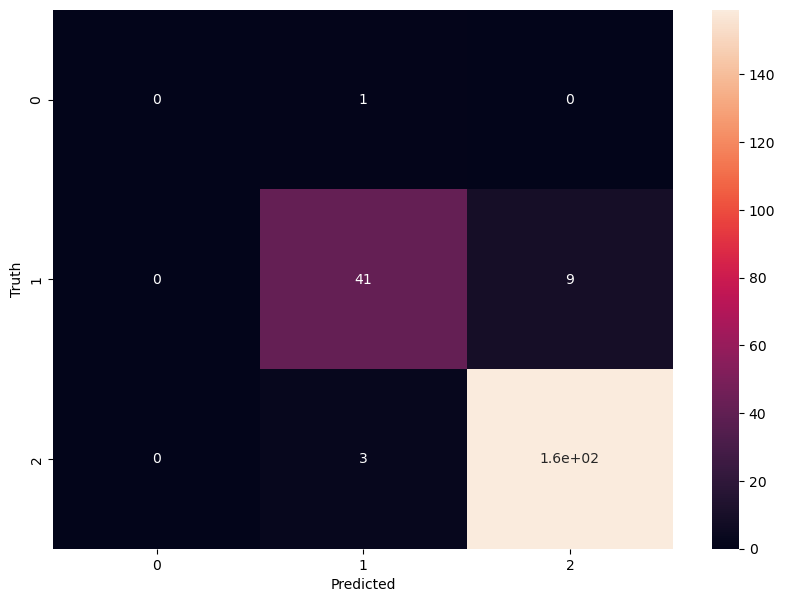

In [35]:
cm = sm.confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
precision = sm.precision_score(y_test, y_predicted, average = 'micro')
precision

0.9389671361502347

In [37]:
recall = sm.recall_score(y_test, y_predicted, average = 'micro')
recall

0.9389671361502347